<a href="https://colab.research.google.com/github/adikalamaro/deep-learning-project-final/blob/main/sigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  #install kaggle

!pip install -q kaggle

In [ ]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import to_categorical, plot_model
import numpy
from numpy import argmax
from numpy import mean
from numpy import std
from numpy import expand_dims
from sklearn.metrics import accuracy_score
from keras.datasets.cifar10 import load_data
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import os
import glob
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import *
from keras.layers import *
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
import keras.backend as K

In [ ]:
!pip install tensorflow keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pocoloco345","key":"a38897091bd1b43fbf47b3d0ce070214"}'}

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"mornataf","key":"7235f5a22a774d9911151b50915f62fc"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nikhilroxtomar/brain-tumor-segmentation

100% 311M/312M [00:11<00:00, 30.6MB/s]
100% 312M/312M [00:11<00:00, 29.0MB/s]


In [ ]:
!unzip brain-tumor-segmentation

Streaming output truncated to the last 5000 lines.
  inflating: images/2013.png         
  inflating: images/2014.png         
  inflating: images/2015.png         
  inflating: images/2016.png         
  inflating: images/2017.png         
  inflating: images/2018.png         
  inflating: images/2019.png         
  inflating: images/202.png          
  inflating: images/2020.png         
  inflating: images/2021.png         
  inflating: images/2022.png         
  inflating: images/2023.png         
  inflating: images/2024.png         
  inflating: images/2025.png         
  inflating: images/2026.png         
  inflating: images/2027.png         
  inflating: images/2028.png         
  inflating: images/2029.png         
  inflating: images/203.png          
  inflating: images/2030.png         
  inflating: images/2031.png         
  inflating: images/2032.png         
  inflating: images/2033.png         
  inflating: images/2034.png         
  inflating: images/2035.png         

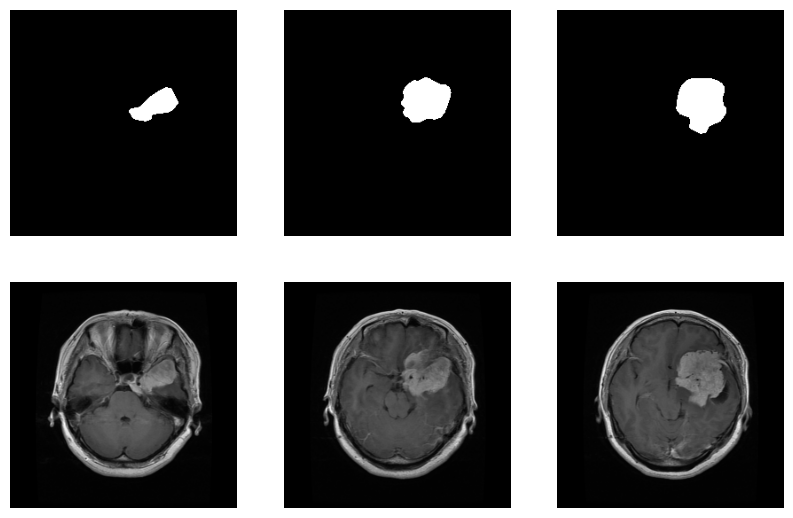

In [ ]:

SIZE_X = 256
SIZE_Y = 256
images = []
masks = []

for i in range(1, 3064):
    # Construct the image and mask file paths based on the number 'i'

    image_filename = f'{i}.png'
    mask_filename = f'{i}.png'

    imagePath = os.path.join('images', image_filename)
    img = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.uint8)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    img = cv2.merge([img, img, img])
    images.append(img)

    maskPath = os.path.join('masks', mask_filename)
    mask = cv2.imread(maskPath, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
    mask = mask / 255
    mask = mask.astype(np.uint8)
    masks.append(mask)

images = np.array(images)
masks = np.array(masks)

n_samples = 3
plt.figure(figsize = (10, 10))
for i in range(n_samples):
    plt.subplot(n_samples, n_samples, 1 + i)
    plt.axis('off')
    plt.imshow(masks[i], cmap = 'gray')
# plot target image
for i in range(n_samples):
    plt.subplot(n_samples, n_samples, 1 + n_samples + i)
    plt.axis('off')
    plt.imshow(images[i], cmap = 'gray')
plt.show()

In [ ]:
y = np.expand_dims(masks, axis = 3)
print(y.shape)

(3063, 256, 256, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = masks.shape
train_masks_reshaped = masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped.ravel())
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

print(np.unique(train_masks_encoded_original_shape))
print(train_masks_encoded_original_shape.shape)

[0 1]
(3063, 256, 256)


In [ ]:
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis = 3)
print(train_masks_input.shape)

(3063, 256, 256, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, train_masks_input,
                                                    test_size = 0.2, shuffle = True, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.2, random_state = 42)

from tensorflow.keras.utils import to_categorical
n_classes = 2
train_masks_cat = to_categorical(y_train, num_classes = n_classes)
test_masks_cat = to_categorical(y_test, num_classes = n_classes)
val_masks_cat = to_categorical(y_val, num_classes = n_classes)

print(f'TRAIN SET:\n'
     f'X_train shape: {X_train.shape}\n'
     f'y_train shape: {train_masks_cat.shape}\n\n'
     f'VALIDATION SET:\n'
     f'X_val shape: {X_val.shape}\n'
     f'y_val shape: {val_masks_cat.shape}\n\n'
     f'TEST SET:\n'
     f'X_test shape: {X_test.shape}\n'
     f'y_test shape: {test_masks_cat.shape}')

TRAIN SET:
X_train shape: (1960, 256, 256, 3)
y_train shape: (1960, 256, 256, 2)

VALIDATION SET:
X_val shape: (490, 256, 256, 3)
y_val shape: (490, 256, 256, 2)

TEST SET:
X_test shape: (613, 256, 256, 3)
y_test shape: (613, 256, 256, 2)


In [ ]:
def double_conv_block(x, n_filters):
    x = Conv2D(n_filters, 3, padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(n_filters, 3, padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = MaxPool2D(2)(f)
    return f, p

def upsample_block(x, conv_features, n_filters):
    x = Conv2DTranspose(n_filters, 3, 2, padding = "same")(x)
    x = concatenate([x, conv_features])
    x = double_conv_block(x, n_filters)
    return x

In [ ]:

LR = 0.001  # Learning rate
optimizer = Adam(LR)  # Optimizer
activation = 'sigmoid'  # Activation function for the output layer
loss = 'binary_crossentropy'  # Loss function

# Metrics: Dice coefficient
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 2  # Classes: tumor and background
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:, :, :, i])
        y_pred_f = K.flatten(y_pred[:, :, :, i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
    return total_loss

metrics = [dice_coef]
img_size = (256, 256, 3)  # Image dimensions

def build_unet_model(img_size, num_classes):
    # Input
    inputs = Input(shape=img_size)
    # Encoder
    # 1 - Downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - Downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - Downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - Downsample
    f4, p4 = downsample_block(p3, 512)
    # 5 - Bottleneck
    bottleneck = double_conv_block(p4, 1024)
    # Decoder
    # 6 - Upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - Upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - Upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - Upsample
    u9 = upsample_block(u8, f1, 64)
    # Output
    outputs = Conv2D(num_classes, 1, padding="same", activation=activation)(u9)
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model


In [ ]:
K.clear_session()

unet_model = build_unet_model(img_size, n_classes)

unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

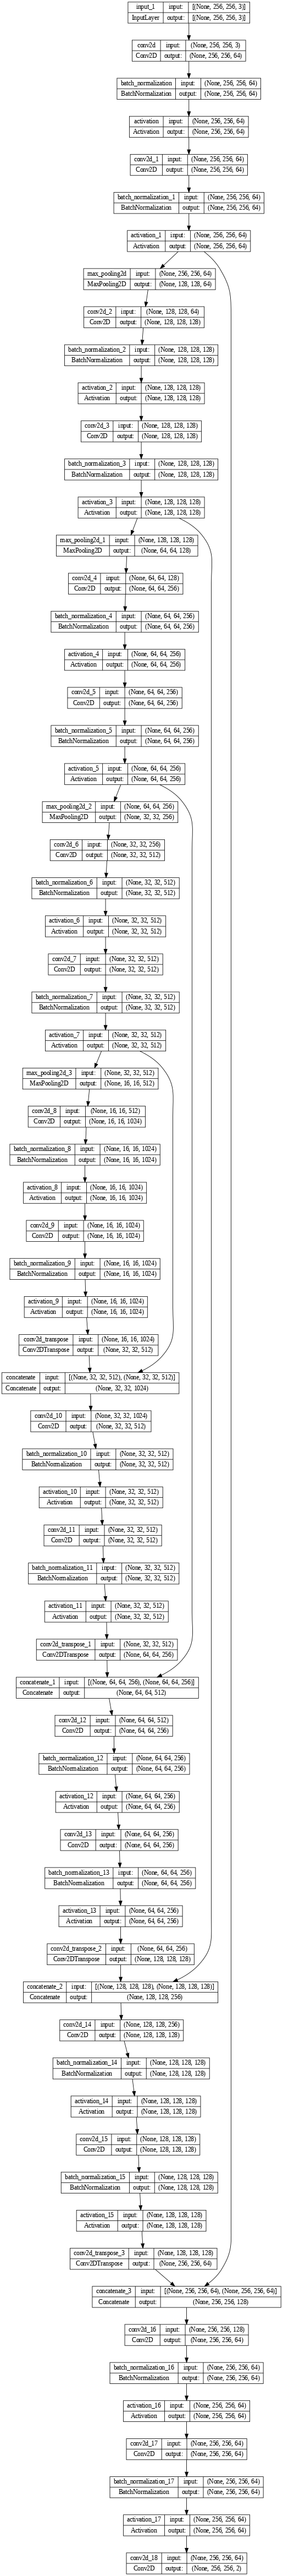

In [ ]:
plot_model(unet_model, show_shapes = True, show_layer_names = True, dpi = 60)


In [ ]:
unet_model.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = metrics)


from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model

earlystopper = EarlyStopping(patience = 5, verbose = 1)
checkpointer = ModelCheckpoint(filepath = '/kaggle/working/checkpoint.hdf5',
                               verbose = 1,
                               save_best_only = True, save_weights_only = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.4,
                              patience = 3, min_lr = 0.001,
                              verbose = 1,  cooldown = 1)

history = unet_model.fit(X_train, train_masks_cat, batch_size = 32, epochs = 15, verbose = 1,
                        shuffle = True, callbacks = [earlystopper, checkpointer, reduce_lr],
                        validation_data = (X_val, val_masks_cat))

Epoch 1/10
196/196 [==============================] - ETA: 0s - loss: 0.1299 - dice_coef: 0.5090
Epoch 1: val_loss improved from inf to 0.45540, saving model to /kaggle/working/checkpoint.hdf5
196/196 [==============================] - 68s 205ms/step - loss: 0.1299 - dice_coef: 0.5090 - val_loss: 0.4554 - val_dice_coef: 0.4622 - lr: 0.0010
Epoch 2/10
196/196 [==============================] - ETA: 0s - loss: 0.0576 - dice_coef: 0.5936
Epoch 2: val_loss improved from 0.45540 to 0.08743, saving model to /kaggle/working/checkpoint.hdf5
196/196 [==============================] - 39s 201ms/step - loss: 0.0576 - dice_coef: 0.5936 - val_loss: 0.0874 - val_dice_coef: 0.5028 - lr: 0.0010
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.0447 - dice_coef: 0.6566
Epoch 3: val_loss improved from 0.08743 to 0.06092, saving model to /kaggle/working/checkpoint.hdf5
196/196 [==============================] - 39s 201ms/step - loss: 0.0447 - dice_coef: 0.6566 - val_loss: 0.0609 - v

In [ ]:
unet_model.save('trained_unet_model.h5')

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

100% 86.8M/86.8M [00:03<00:00, 37.4MB/s]
100% 86.8M/86.8M [00:03<00:00, 28.1MB/s]


In [ ]:
!unzip brain-tumor-classification-mri

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

# Define your custom metric function
def dice_coef(y_true, y_pred, smooth = 1.0):
    class_num = 2
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
    return total_loss

# Register the custom metric function
custom_objects = {'dice_coef': dice_coef}

# Load the model using the custom_objects parameter
model = load_model('trained_unet_model.h5', custom_objects=custom_objects)


In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X = []
y = []
image_size = 256

# Iterate over the files in the folder
for i in labels:
    folderPath = os.path.join('/content/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)  # Append the image array to the list of images
        y.append(i) # Append label name

# Iterate over the files in the folder
for i in labels:
    folderPath = os.path.join('/content/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(i)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

100%|██████████| 74/74 [00:00<00:00, 177.80it/s]


In [ ]:
def visualize_prediction(original_image, predicted_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with three subplots

    # Display original image on the left subplot
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Process predicted mask for visualization
    threshold = 0.02  # Adjust threshold as needed
    binary_mask = (predicted_mask[..., 1] > threshold).astype(int)

    # Display predicted mask on the middle subplot (binary mask)
    axes[1].imshow(binary_mask, cmap='gray')
    axes[1].set_title('Predicted Binary Mask')
    axes[1].axis('off')

    # Display predicted mask on the right subplot (probability map)
    axes[2].imshow(predicted_mask[..., 1], cmap='jet', alpha=0.7)
    axes[2].set_title('Predicted Probability Map')
    axes[2].axis('off')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()  # Show the figure

# # Assuming you have 'X' as your original images and 'predicted_masks' as the predicted masks
# for i in range(4):
#     visualize_prediction(X[i], predicted_masks[i])


102/102 [==============================] - 16s 161ms/step


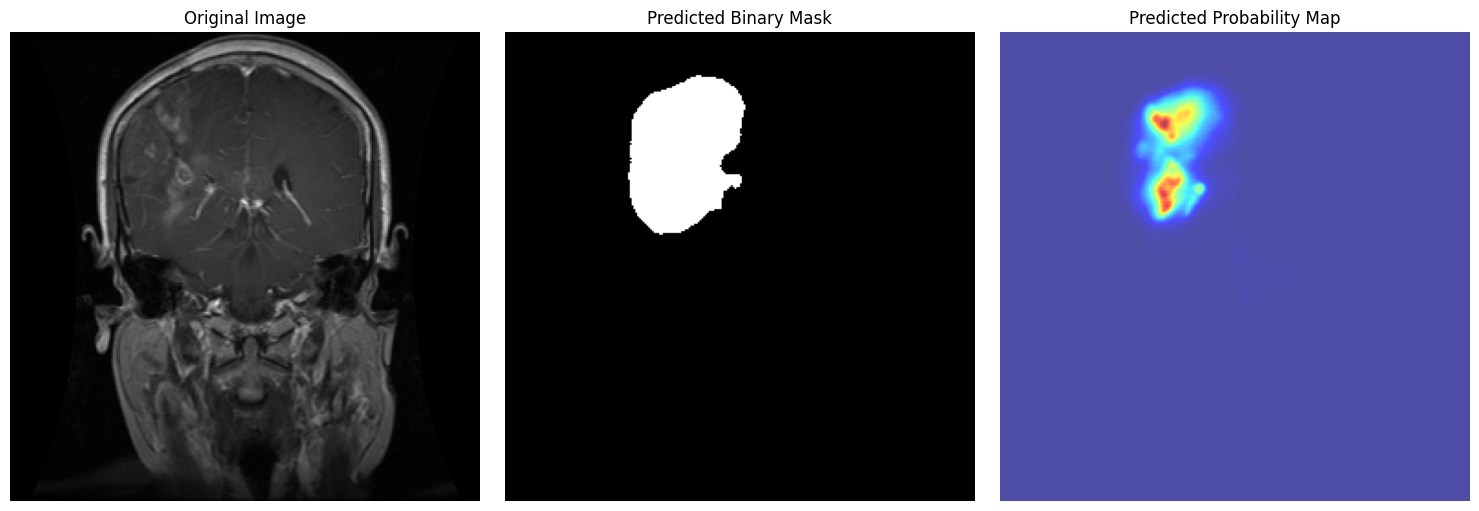

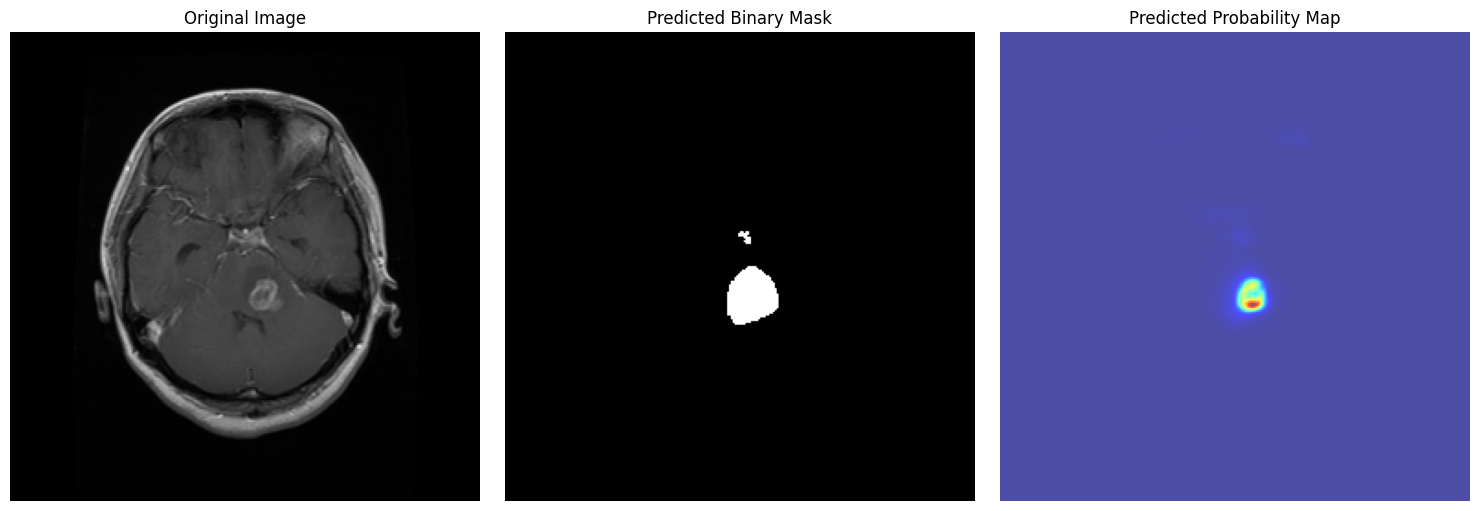

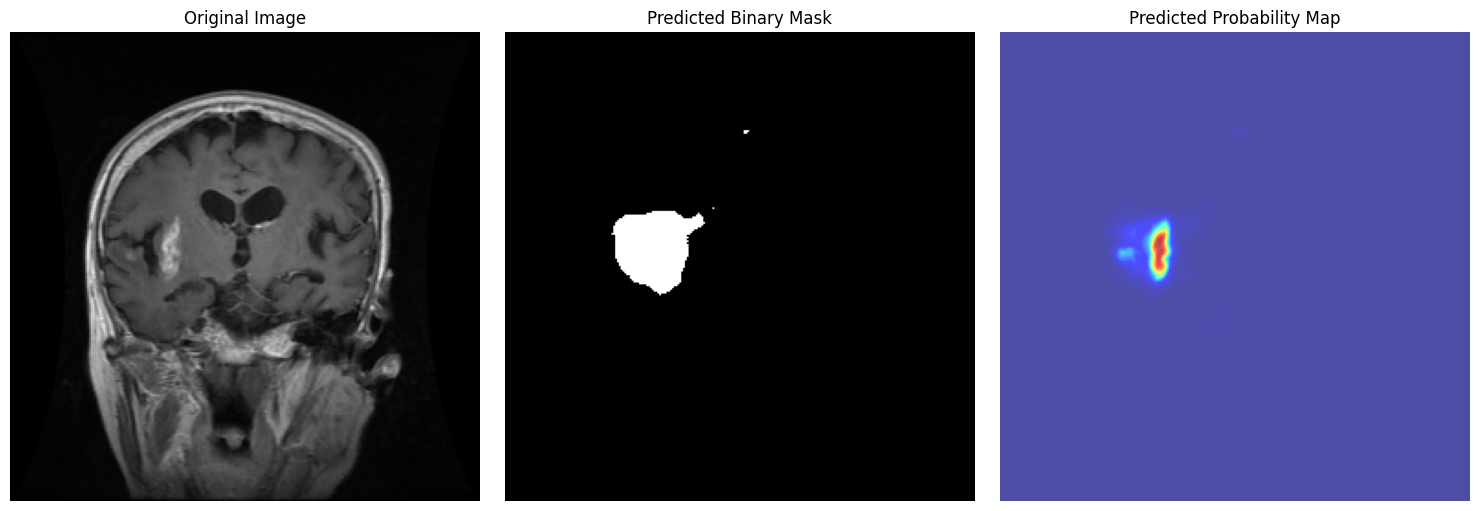

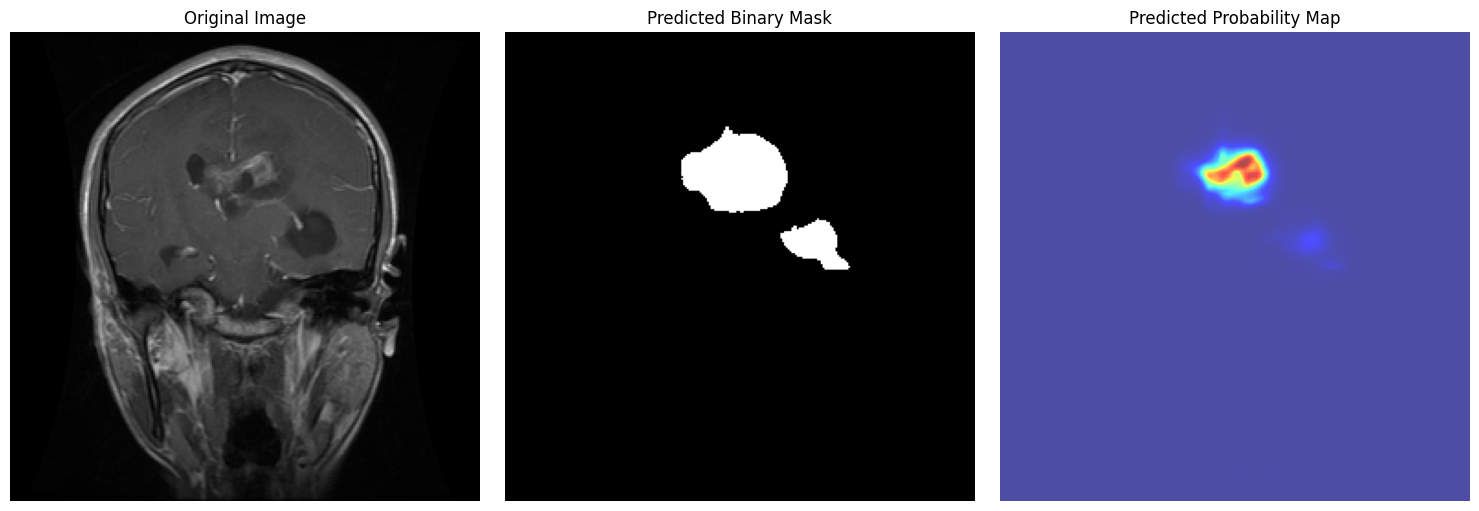

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image


# Predict masks for the new images
predicted_masks = model.predict(X)

# Post-process predicted masks if needed

# Visualize results
for i in range(4):
    visualize_prediction(X[i], predicted_masks[i])


In [ ]:
predicted_masks.shape

(3264, 256, 256, 2)

In [ ]:
Xn = predicted_masks

In [ ]:
# Split the dataset into training and test sets
Xn_train, Xn_test, yn_train,yn_test = train_test_split(Xn, y, test_size=0.2, random_state=42)

In [ ]:
Xn_train = Xn_train.astype('float32')
Xn_test = Xn_test.astype('float32')
# X_val= X_val.astype('float32')

In [ ]:
# We want the values to be between 0 to 1

Xn_train = Xn_train/255
Xn_test = Xn_test/255
# X_val = X_val/255

In [ ]:
yn_train = yn_train.reshape(-1, 1)  # Reshape to a column vector
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(yn_train)
yn_train = one_hot_encoder.transform(yn_train).toarray()

In [ ]:
yn_test = yn_test.reshape(-1, 1)  # Reshape to a column vector
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(yn_test)
yn_test = one_hot_encoder.transform(yn_test).toarray()

In [ ]:
import tensorflow as tf

# Assuming you have loaded your images and labels into X_train and y_train

# Resize images to (224, 224)
Xn_train_resized = tf.image.resize(Xn_train, (224, 224))
Xn_test_resized = tf.image.resize(Xn_test, (224, 224))

# Convert image datatype to float32
Xn_train_resized = tf.cast(Xn_train_resized, tf.float32)
Xn_test_resized = tf.cast(Xn_test_resized, tf.float32)

# Perform per-image standardization (subtract mean and divide by standard deviation)
Xn_train_resized = tf.image.per_image_standardization(Xn_train_resized)
Xn_test_resized = tf.image.per_image_standardization(Xn_test_resized)

# Check the shape of the resized images
print("Training images shape:", Xn_train_resized.shape)  # (num_samples, 224, 224, 3)


Training images shape: (2611, 224, 224, 2)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model (without the top classifier)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze some layers
for layer in base_model.layers[:10]:
    layer.trainable = False

# Replace the classifier
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the modified model
model_vgg = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
def define_model() :
  model = tf.keras.Sequential()

  # Convolutional layers (conv, pooling, dropout)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 2)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))  # Increased dropout

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))  # Increased dropout

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))  # Increased dropout

  # Flatten the feature maps
  model.add(layers.Flatten())

  # Fully connected layers with L2 regularization
  from tensorflow.keras.regularizers import l2
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))  # Increased dropout

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))  # Increased dropout

  # Output layer for multi-class classification
  model.add(layers.Dense(4, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
model=define_model()

In [ ]:

# Set batch size and number of epochs
batch_size = 32
epochs = 10

# Train your model using the fit method
model.fit(
    Xn_train, yn_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

Epoch 1/10
74/74 [==============================] - 5s 41ms/step - loss: 1.3767 - accuracy: 0.2678 - val_loss: 1.3607 - val_accuracy: 0.2710
Epoch 2/10
74/74 [==============================] - 3s 37ms/step - loss: 1.3615 - accuracy: 0.2857 - val_loss: 1.3555 - val_accuracy: 0.3321
Epoch 3/10
74/74 [==============================] - 3s 37ms/step - loss: 1.3611 - accuracy: 0.2784 - val_loss: 1.3562 - val_accuracy: 0.3321
Epoch 4/10
74/74 [==============================] - 3s 38ms/step - loss: 1.3599 - accuracy: 0.2793 - val_loss: 1.3554 - val_accuracy: 0.3321
Epoch 5/10
74/74 [==============================] - 3s 38ms/step - loss: 1.3616 - accuracy: 0.2801 - val_loss: 1.3572 - val_accuracy: 0.3321
Epoch 6/10
74/74 [==============================] - 3s 37ms/step - loss: 1.3614 - accuracy: 0.2780 - val_loss: 1.3566 - val_accuracy: 0.3321
Epoch 7/10
74/74 [==============================] - 3s 37ms/step - loss: 1.3604 - accuracy: 0.2861 - val_loss: 1.3576 - val_accuracy: 0.2710
Epoch 8/10
74

In [ ]:
model_vgg.evaluate(Xn_test_resized,yn_test)